# Homework 5

Due date: Jun 2, 2024

### Submission instructions: 
- __Autograder will be used for scoring, you are required to write a module in a file `hw5module.py` as in Homeworks 1 and 2.__ 
- You are also required to convert this notebook as a separate Python file, __`hw5.py`__. 
- Also, please keep your indentifiable information (ID, name, and a list of collaborators) in a separate file __`hw5_studentinfo.txt`__. 
- Submit __`hw5.ipynb`__ (this notebook), `hw5.py`, `hw5module.py`, and `hw5_studentinfo.txt` on Gradescope under the window "Homework 5 - code". Do **NOT** change the file name. This will be checked by the autograder as well. 
- Make sure all your code and text outputs in the problems are visible in your PDF submission. 



## Introduction

What's your favorite movie? Wouldn't it be nice to find more shows that you might like to watch, based on ones you know you like? Tools that address questions like this are often called "recommender systems." Powerful, scalable recommender systems are behind many modern entertainment and streaming services, such as Netflix and Spotify. While most recommender systems these days involve machine learning, there are also ways to make recommendations that don't require such complex tools. 

In this homework, you'll use webscraping to answer the following question: 

> What movie or TV shows share actors with your favorite movie?

The idea of this question is that, if the movie Y has many of the same actors as the movie X, and you like X, you might also enjoy Y. 

This homework has two parts. In the first, larger part, you'll write a webscraper for finding shared actors on TMDB. In the second, smaller part, you'll use the results from your scraper to make recommendations. 

You need to meet the specifications for a complete list of what you need to do to obtain full credit. 

## Instructions

### 1. Setup

#### 1.1. Locate the Starting TMDB Page

Pick your favorite movie, and locate its TMDB page by searching on [https://www.themoviedb.org/](https://www.themoviedb.org/). For example, my favorite movie is _Harry Potter and the ~~Sorcerer's~~Philosopher's Stone_.
Its TMDB page is at:  

```
https://www.themoviedb.org/movie/671-harry-potter-and-the-philosopher-s-stone/
```

Save this URL for a moment. 

#### 1.2. Dry-Run Navigation

Now, we're just going to practice clicking through the navigation steps that our scraper will take. 

First, click on the *Full Cast & Crew* link. This will take you to a page with URL of the form 

```
<original_url>cast/
```

Next, scroll until you see the *Cast* section. Click on the portrait of one of the actors. This will take you to a page with a different-looking URL. For example, the URL for Alan Rickman, who played Severus Snape, is 

```
https://www.themoviedb.org/person/4566-alan-rickman
```

Finally, scroll down until you see the actor's *Acting* section. Note the titles of a few movies and TV shows in this section. 

Our scraper is going to replicate this process. Starting with your favorite movie, it's going to look at all the actors in that movie, and then log all the *other* movies or TV shows that they worked on. 

At this point, it would be a good idea for you to use the Developer Tools on your browser to inspect individual HTML elements and look for patterns among the names you are looking for.

#### 1.3. Create your module

No template is provided for this homework. You will write your two functions in a separate file `hw5module.py`.

#### 1.4. Some hints

You may run into `403` (forbidden) errors once the website detects that you’re a bot. See the web scraping lecture note and these links ([link1](https://doc.scrapy.org/en/latest/topics/practices.html#avoiding-getting-banned), [link2](https://scrapeops.io/python-scrapy-playbook/scrapy-403-unhandled-forbidden-error/), [link3](https://scrapeops.io/web-scraping-playbook/403-forbidden-error-web-scraping/), [link4](https://scrapingrobot.com/blog/most-common-user-agents/)) for how to work around that issue. Adding a delay for each page and changing user agent will often be most helpful!

Keep an eye out for `403` error you see! Make sure to examine the `status_code` attribute of the returned value from `requests.get()`. You want your status to be `200` (meaning OK). Print something if you see `403` (or raise an `Exception` if you are familiar with it).
If they know that you are on Python or if you are requesting pages without much delays, they will certainly try to block you. One way to change user agent on your code is presented in the lecture note. For the autograder to finish in reasonable time, please do not put the delays longer than two seconds between requests.

### 2. Write Your Scraper

Now, you will write a web scraper for a movie of your choice by giving its subdirectory on TMDB website as an argument. We will implement two parsing functions.

<!-- `parse(suffix)` should assume that you start on a movie page, and then navigate to the *Full Cast & Crew* page. Remember that this page has url `<movie_url>cast`. (You are allowed to hardcode that part.) Once there, the `parse_full_credits(suffix)` should be called. The `parse()` function does not return any data. This function should be no more than 5 lines of code, excluding comments and docstrings. Example: `parse("671-harry-potter-and-the-philosopher-s-stone")`.-->
- `parse_full_credits(movie_directory)` should assume that you start on the *Full Cast & Crew* page with the url `https://www.themoviedb.org/movie/<movie_directory>/cast`. Its purpose is to call the function `parse_actor_page(df, actor_directory)` for the page of each actor listed on the page. Crew members are not included (consider using `not` command in CSS selector). Initialize an empty `DataFrame` with two columns `actor` and `movie_or_TV_name`, then call the function `parse_actor_page` for each actor. The `parse_full_credits()` function returns the fully loaded `df`, with actor names and movie titles each actor worked on. The `DataFrame` should not have duplicate entries, and it should be sorted by actor name as the primary key, then movie titles. Try to avoid visiting the same page multiple times. This function should be no more than 10 lines of code, excluding comments and docstrings. 
  - Example: `df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")`
- `parse_actor_page(df, actor_directory)` should assume that you start on the page of an actor. For each movie with the "Acting" role, you will add a row to the `DataFrame` `df` with two columns, `actor` and `movie_or_TV_name`. Please only include the works listed in "Acting" section of the actor page. Keep in mind that "Acting" might not be on the top of their lists; for example, [David Holmes](https://www.themoviedb.org/person/1796507-david-holmes) is credited with an acting role in HP1, but spent most of his career as a stunt double of Daniel Radcliffe (as a part of Crew). On his page, you will see "Crew" before "Acting". 
Note that you will need to determine both the name of the actor and the name of each movie or TV show through parsing the HTML page. This function should be no more than 20 lines of code, excluding comments and docstrings. It should return the `DataFrame` `df` with all the works of the actor added at the end of `df`. 
  - Example: `df_updated = parse_actor_page(df, "10980-daniel-radcliffe")`

Provided that these functions are correctly implemented, you can run the code 
```python
df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")
```
to create a `DataFrame` with a column for actors and another for movies or TV shows for _Harry Potter and the Philosopher's Stone_. You might want to save the result as a `.csv` file before proceeding to the next part.

Test your functions; make sure to check the following: 
- `parse_actor_page`
  - only parses all the works under the "Acting" section
  - even if "Acting" is not on the top of the lists
- `parse_full_credits` 
  - is parsing all the actors,
  - is not parsing crew members,
  - does not parsing duplicate pages, and
  - of course, if the results are correct.

#### Challenge
If you’re looking for a challenge, think about ways that may make your recommendations more accurate. Consider scraping the number of episodes as well or limiting the number of actors you get per show to make sure you only get the main series cast. If you do so, please use separate function names.

### 3. Make Your Recommendations 

Once you're happy with the operation of your webscraper, compute a sorted list with the top movies and TV shows that share actors with your favorite movie. For example, it may have two columns: one for “movie names” and “number of shared actors”.

Feel free to be creative. You can show a pandas data frame, a chart using `matplotlib` or `plotly`, or any other sensible display of the results. 

### 4. Documentation

In this Jupyter Notebook, you should describe how your scraper works, as well as the results of your analysis. When describing your scraper, I recommend dividing it up into the two distinct parsing function, and discussing them one-by-one. For example: 

> *In this report, I'm going to make a super cool web scraper...*
> *Here's how we set up the project...*
> ```
> <implementation of parse()>
> ```
> *This function works by...*

> ```
> <implementation of parse_full_credits()>
> ```
> *To write this function, I...*

In addition to describing your scraper, your report should include a table and visualization of numbers of shared actors. 

You should guide your reader through the process of setting up and running the scraper.


## Specifications

### Coding Problem

1. Each of the three parsing methods are correctly implemented.
2. `parse()` is implemented in no more than 5 lines. 
3. `parse_full_credits()` is implemented in no more than 5 lines. 
4. `parse_actor_page()` is implemented in no more than 15 lines. 
5. A table or list of results or pandas dataframe is shown.
6. A visualization with `matplotlib`, `plotly`, or `seaborn` is shown. 

### Style and Documentation

7. Each of the three `parse` functions has a short docstring describing its assumptions (e.g. what kind of page it is meant to parse) and its effect, including navigation and data outputs. 
8. Each of the three `parse` functions has helpful comments for understanding how each chunk of code operates. 

### Writing

9. The report is written in engaging and clear English. Grammar and spelling errors are acceptable within reason. 
10. The report explains clearly how to set up the project, run the scraper, and access the results. 
11. The report explains how each of the three `parse` methods works. 

## Answer:
## Web Scraper and Shared Actors Analysis Report
In this report, I'm going to create a web scraper to extract actor data from my favorite movie "Interstellar" from the website and analyze the number of shared actors between other 5 top popular movies.


### 1. Setting Up the Project
First, we need to install and import the necessary libraries:

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

### 2. Implementation of function
Next, we implement the two main functions for our web scraper: parse_full_credits() and parse_actor_page().

This `parse_full_credits` function works by parsing the full credits page of a given movie to get the list of actors and their movies/TV shows.

In [27]:
def parse_full_credits(movie_directory):
    """
    Parse the full credits page of a given movie to get the list of actors and their movies/TV shows.
    
    Parameters:
    movie_directory (str): The directory string for the movie on TMDB.
    
    Returns:
    pd.DataFrame: DataFrame containing actor names and movie/TV show titles.
    """
    base_url = "https://www.themoviedb.org/movie/"
    full_cast_url = f"{base_url}{movie_directory}/cast"
    
    # Request the full cast page of the movie
    response = requests.get(full_cast_url, headers={'User-Agent': 'Mozilla/5.0'})

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Initialize an empty DataFrame to store the actor names and their movies/TV shows
    df = pd.DataFrame(columns=['actor', 'movie_or_TV_name'])

    # Select all actor links in the cast section, excluding crew members
    # 'ol.people li:not(:has(p.episode_count_crew))' selects list items without 'p.episode_count_crew'
    # 'a[href*="/person/"]' selects anchor tags with 'href' attribute containing '/person/'
    actor_links = soup.select('ol.people li:not(:has(p.episode_count_crew)) a[href*="/person/"]')
    
    # Iterate over each selected actor link
    for a_tag in actor_links:
        # Extract the actor's directory from the href attribute
        actor_url_suffix = a_tag['href']
        actor_directory = actor_url_suffix.split('/')[-1]
        
        # Parse the actor's page to get their movies/TV shows and update the DataFrame
        df = parse_actor_page(df, actor_directory)
        
        # Wait for a short period between requests to prevent being blocked by the website
        time.sleep(0.6) 
        
    # Remove duplicate entries from the DataFrame
    df.drop_duplicates(inplace=True)
    
    # Sort the DataFrame by actor names and movie/TV show titles
    df.sort_values(by=['actor', 'movie_or_TV_name'], inplace=True)
    
    return df

To write this function, I:

1. Constructed the URL for the full cast page of the movie.
2. Sent a GET request to the URL and parsed the response content using BeautifulSoup.
3. Selected all actor links in the cast section, excluding crew members, using CSS selectors.
4. Iterated over the actor links to parse each actor's page and extract their movie/TV show data.

This `parse_actor_page` function extracts the movie and TV show titles for a given actor.

In [28]:
def parse_actor_page(df, actor_directory):
    """
    Parse the actor's page to get the list of movies and TV shows they have been in.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to append the actor and their movies/TV shows to.
    actor_directory (str): The directory string for the actor on TMDB.
    
    Returns:
    pd.DataFrame: Updated DataFrame with the actor and their movies/TV shows.
    """
    base_url = "https://www.themoviedb.org/person/"
    actor_url = f"{base_url}{actor_directory}?credit_department=Acting"
    
    # Request the actor's page
    response = requests.get(actor_url, headers={'User-Agent': 'Mozilla/5.0'}) 
    
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Get the actor's name from the 'h2' tag with class 'title'
    actor_name_tag = soup.find('h2', class_='title')
    actor_name = actor_name_tag.text.strip() if actor_name_tag else 'Unknown Actor'

    # Find the acting section by searching for the section with 'Acting' in the 'h3' header
    acting_section = None
    for section in soup.find_all('section'):
        header = section.find('h3')
        if header and 'Acting' in header.text:
            acting_section = section
            break

    # If the acting section is found, extract the movie and TV show titles
    if acting_section:
        titles_set = set()  # Use a set to avoid duplicate titles
        roles = acting_section.find_all('bdi')  # Find all 'bdi' tags containing titles
        for role in roles:
            title = role.text.strip()
            if title not in titles_set:
                titles_set.add(title)  # Add unique titles to the set
                # Append the actor and movie/TV show to the DataFrame
                df = pd.concat([df, pd.DataFrame({'actor': [actor_name], 'movie_or_TV_name': [title]})], ignore_index=True)

    return df

To write this function, I:

1. Constructed the URL for the actor's page.
2. Sent a GET request to the URL and parsed the response content using BeautifulSoup.
3. Extracted the actor's name and found the acting section.
4. Extracted movie and TV show titles from the acting section and appended them to the DataFrame.

In [29]:
# test
movie_directory = "671-harry-potter-and-the-philosopher-s-stone"
df = parse_full_credits(movie_directory)

In [30]:
df

,actor,movie_or_TV_name
4377,Adrian Rawlins,10 Days to War
4386,Adrian Rawlins,Agatha Christie's Marple
4384,Adrian Rawlins,Ahead of the Class
4355,Adrian Rawlins,All Creatures Great & Small
4397,Adrian Rawlins,Badger
...,...,...
3754,Zoë Wanamaker,Tony Awards
3708,Zoë Wanamaker,Who Do You Think You Are?
3720,Zoë Wanamaker,Wilde
3689,Zoë Wanamaker,Wodehouse In Exile


In [31]:
df.to_csv('harry_potter_cast_movies.csv', index=False)

### Results of the Recommendation Analysis

After running the scraper, we obtained a DataFrame of "Interstellar" with the list of actors and their associated movies/TV shows. To analyze the shared actors between movies, we used the following code first to get data of movie "Interstellar":

In [32]:
movie_directory = "157336-interstellar"
df = parse_full_credits(movie_directory)
print(df)
df.to_csv('Interstellar.csv', index=False)

                          actor       movie_or_TV_name
4178  Alexander Michael Helisek          2 Broke Girls
4179  Alexander Michael Helisek         Grey's Anatomy
4175  Alexander Michael Helisek           Interstellar
4176  Alexander Michael Helisek         Silicon Valley
4174  Alexander Michael Helisek             This Is Us
...                         ...                    ...
3339             William Devane                  Yanks
4107      William Patrick Brown                  Chuck
4106      William Patrick Brown  Friends with Benefits
4104      William Patrick Brown           Interstellar
4105      William Patrick Brown             Mighty Med

[2102 rows x 2 columns]


Then we get date from the top 5 popular movie and make them to be a dataframe with two columns “movie names” and “number of shared actors” associated with movie "Interstellar".

In [33]:
# Top 5 movies
movie1 = "823464-godzilla-x-kong-the-new-empire"
movie1_name = "Godzilla x Kong: The New Empire"
movie2 = "653346-kingdom-of-the-planet-of-the-apes"
movie2_name = "Kingdom of the Planet of the Apes"
movie3 = "843527-the-idea-of-you"
movie3_name = "The Idea of You"
movie4 = "291805-now-you-see-me-2"
movie4_name = "Now You See Me 2"
movie5 = "872585-oppenheimer"
movie5_name = "Oppenheimer"

In [34]:
print(movie1_name)
df1 = parse_full_credits(movie1)
df1

Godzilla x Kong: The New Empire


,actor,movie_or_TV_name
363,Alex Ferns,9 Days of the Vulture
357,Alex Ferns,Ancient Rome: The Rise and Fall of an Empire
343,Alex Ferns,Andor: A Disney+ Day Special Look
365,Alex Ferns,Black Velvet Band
364,Alex Ferns,Britannic
...,...,...
788,Vincent B. Gorce,The House of Cards
783,Vincent B. Gorce,Thirteen Lives
800,Yeye Zhou,Furiosa: A Mad Max Saga
801,Yeye Zhou,Godzilla x Kong: The New Empire


In [35]:
print(movie2_name)
df2 = parse_full_credits(movie2)
df2

Kingdom of the Planet of the Apes


,actor,movie_or_TV_name
1170,Anastasia Miller,Kingdom of the Planet of the Apes
855,Andy McPhee,2067
867,Andy McPhee,Altered Spirits
880,Andy McPhee,Animal Kingdom
900,Andy McPhee,Bad Boy Bubby
...,...,...
436,William H. Macy,WarGames
317,William H. Macy,Watch What Happens Live with Andy Cohen
355,William H. Macy,Welcome to Collinwood
326,William H. Macy,Wild Hogs


In [36]:
print(movie3_name)
df3 = parse_full_credits(movie3)
df3

The Idea of You


,actor,movie_or_TV_name
1285,Adele,2022 Rock & Roll Hall of Fame Induction Ceremony
1302,Adele,73 Questions
1304,Adele,Adele - Live in London
1311,Adele,Adele Live at iTunes Festival London
1292,Adele,Adele One Night Only
...,...,...
882,Trevor David,Stalker
881,Trevor David,The Idea of You
885,Trevor David,V.I.P.
1244,Trinity Ansah,The Idea of You


In [37]:
print(movie4_name)
df4 = parse_full_credits(movie4)
df4

Now You See Me 2


,actor,movie_or_TV_name
3114,Alexander Cooper,Assassin's Creed
3111,Alexander Cooper,Big Dick Energy
3116,Alexander Cooper,Jason Bourne
3117,Alexander Cooper,Now You See Me 2
3115,Alexander Cooper,Parallel
...,...,...
501,Woody Harrelson,Will & Grace
415,Woody Harrelson,Wilson
454,Woody Harrelson,Zombieland
402,Woody Harrelson,Zombieland: Double Tap


In [38]:
print(movie5_name)
df5 = parse_full_credits(movie5)
df5

Oppenheimer


,actor,movie_or_TV_name
6864,Adam Kroeger,Oppenheimer
6866,Adam Kroeger,Successful People
6865,Adam Kroeger,This Is Us
2615,Alden Ehrenreich,A Dentist
2613,Alden Ehrenreich,Beautiful Creatures
...,...,...
6540,Will Roberts,The Buyers
6545,Will Roberts,The Killer
6537,Will Roberts,The Queen of Heaven
6541,Will Roberts,The Search for Secret Santa


In [39]:
# Create shared actor dictionary
movie_counts = {
    movie1_name: 0,
    movie2_name: 0,
    movie3_name: 0,
    movie4_name: 0,
    movie5_name: 0
}

In [40]:
# Fill in the number of share actors
for actor in df1['actor'].unique():
    if actor in df['actor'].unique():
        movie_counts[movie1_name] += 1

for actor in df2['actor'].unique():
    if actor in df['actor'].unique():
        movie_counts[movie2_name] += 1

for actor in df3['actor'].unique():
    if actor in df['actor'].unique():
        movie_counts[movie3_name] += 1
        
for actor in df4['actor'].unique():
    if actor in df['actor'].unique():
        movie_counts[movie4_name] += 1
        
for actor in df5['actor'].unique():
    if actor in df['actor'].unique():
        movie_counts[movie5_name] += 1

In [41]:
# Create the movie and the number of shared actors dataframe
recommendations_df = pd.DataFrame(list(movie_counts.items()), columns=['movie', 'number of shared actors'])
recommendations_df

,movie,number of shared actors
0,Godzilla x Kong: The New Empire,0
1,Kingdom of the Planet of the Apes,0
2,The Idea of You,1
3,Now You See Me 2,1
4,Oppenheimer,4


Create the data visualization

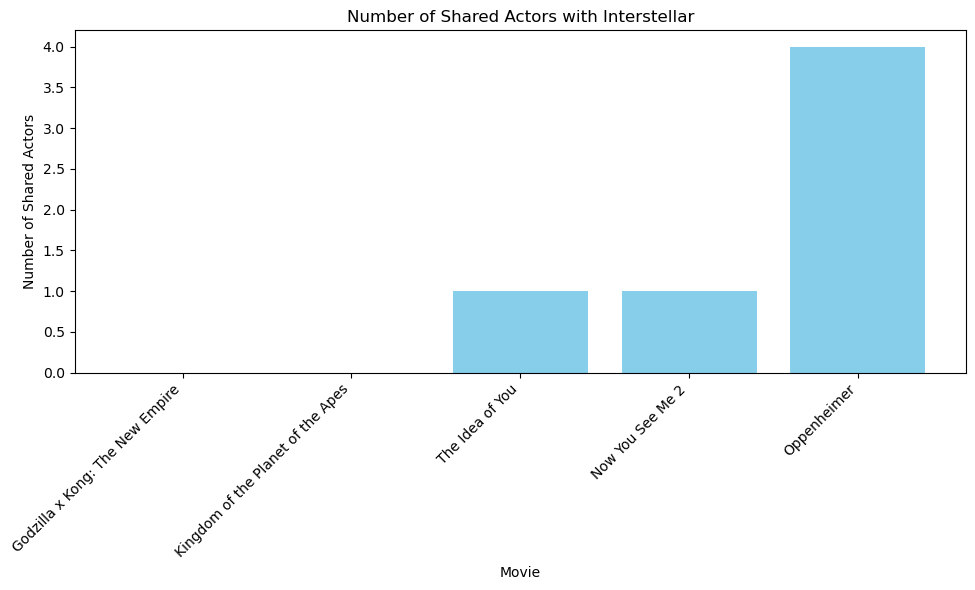

In [42]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(recommendations_df['movie'], recommendations_df['number of shared actors'], color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Number of Shared Actors')
plt.title('Number of Shared Actors with Interstellar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

Here we can see the movie "Oppenheimer" has the most shared actors with movie "Interstellar", which is 4 shared actors. This is reasonable sinec both of these two movies are from the same genre, and that is why they share more actors.

Besides, the movie "The Idea of You" and the movie "Now You See Me 2" have share actors both 1.